In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

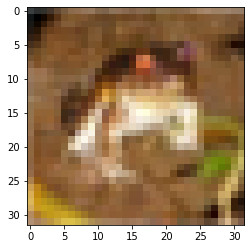

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train[0].max()

255

In [7]:
x_train[0].min()

0

In [9]:
x_train = x_train/255
x_test = x_test/ 255

In [10]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [11]:
32*32*3

3072

In [29]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)               

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test),
         callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 24s 483us/sample - loss: 1.6045 - accuracy: 0.4063 - val_loss: 1.3836 - val_accuracy: 0.4915
Epoch 2/15
50000/50000 [==============================] - 19s 380us/sample - loss: 1.3002 - accuracy: 0.5311 - val_loss: 1.2107 - val_accuracy: 0.5620
Epoch 3/15
50000/50000 [==============================] - 20s 398us/sample - loss: 1.1806 - accuracy: 0.5789 - val_loss: 1.1740 - val_accuracy: 0.5840
Epoch 4/15
50000/50000 [==============================] - 21s 416us/sample - loss: 1.0965 - accuracy: 0.6097 - val_loss: 1.0927 - val_accuracy: 0.6112
Epoch 5/15
50000/50000 [==============================] - 20s 408us/sample - loss: 1.0405 - accuracy: 0.6342 - val_loss: 1.1015 - val_accuracy: 0.6093
Epoch 6/15
50000/50000 [==============================] - 20s 402us/sample - loss: 0.9880 - accuracy: 0.6483 - val_loss: 1.0805 - val_accuracy: 0.6155
Epoch 7/15
50000/50000 [====================

In [39]:
metrics = pd.DataFrame(model.history.history)

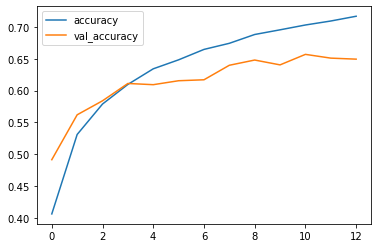

In [40]:
metrics[['accuracy', 'val_accuracy']].plot()

In [41]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.012432438659668, 0.6494]

In [42]:
y_pred = model.predict_classes(x_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1000
           1       0.78      0.82      0.80      1000
           2       0.52      0.60      0.56      1000
           3       0.46      0.41      0.43      1000
           4       0.78      0.35      0.48      1000
           5       0.54      0.59      0.57      1000
           6       0.60      0.82      0.69      1000
           7       0.74      0.69      0.72      1000
           8       0.80      0.71      0.75      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.64     10000
weighted avg       0.66      0.65      0.64     10000



In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1000
           1       0.78      0.82      0.80      1000
           2       0.52      0.60      0.56      1000
           3       0.46      0.41      0.43      1000
           4       0.78      0.35      0.48      1000
           5       0.54      0.59      0.57      1000
           6       0.60      0.82      0.69      1000
           7       0.74      0.69      0.72      1000
           8       0.80      0.71      0.75      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.64     10000
weighted avg       0.66      0.65      0.64     10000

